# 1.
# a. True ___ b. False ___ c. False ___ d. False ___ e. False
# f. True ___ g. True ___ h. False ___ i. False ___ j. True


# 2. e


# 3. e


# 4. Increasing the depth of a decision tree will fit the tree to the data set more. The deeper the tree, the more the risk that the tree overfits the dataset. Thus, the tree may lose it generality. Also, the tree may become more complex.

# 5. k-means can be used to identify outliers. Outliers are likely to have large distance from non-outliers, so they lie separately as a single cluster of 1 or very less number of observations. Running kmeans to cluster them and describing them will bring insight why they are outliers.


# 6. c

# 7. a.
# Cluster 1: centroid1 = 1/3 * {(2, 2) + (4, 4) + (6 ,6)} = (4, 4)
# Cluster 2: centroid2 = 1/2 * {(2, 4) + (4, 2)} = (3, 3)
# Cluster 3: centroid3 = 1/2 * {(5, 5) + (9, 9)} = (7, 7)

# b.
# I would assign (3, 3) to cluster 2 because it is nearest to the centroid of this cluster. Actually, it lies right at the centroid. Assigning to this cluster will not change the inertia.


# 8. a. The depth of the tree is 4
# b. Training error rate = 0, no misclassifications
# Obs 1, 3, 5: 3 legs -> Martian, True
# Obs 2: 2 legs, green, tall -> Martian, True
# Obs 9: 2 legs, green, short -> Human, True
# Obs 6, 8, 10: 2 legs, not green, tall -> Human, True
# Obs 7: 2 legs, not green, short, not smelly -> Human, True
# Obs 4: 2 legs, not green, short, smelly -> Martian, True

In [2]:
# 8. c                                      Height
#                             Tall                          Short
#
#                            Green                          Smelly
#                    Yes            No                Yes             No
#                Martian            Human         Martian             Human
#
# Training error = 0

# 9. e

# 10. Feature scaling is important for the k-means algorithm because it normalize the impact of features to the inertia. The inertia is calculated using distances. If features have different scales, the features with large scale will dominate the distance calculation. Feature scaling normalize features to the same scale and normalize the impact.

# 12. c


# 13. Model 3 classifies only observation 1 to Y-hat = 1. We have 1 True Positive, observation 1, 2 False Negative, observations 2 and 5, and 0 False Positive.
# a. Precision = TP / (TP + FP) = 1 / (1 + 0) = 1
# b. Recall = TP / (TP + FN) = 1 / (1 + 2) = 1/3


In [4]:
# 13. c.       Observation      Y        P         Model 1 Class (0.25)       Model 2 Class (0.5)      Model 3 Class (0.75)
#                    1           1        0.9               1                          1                        1
#                    2           1        0.6               1                          1                        0
#                    3           0        0.6               1                          1                        0
#                    4           0        0.55              1                          1                        0
#                    5           1        0.4               1                          0                        0
#                    6           0        0.3               1                          0                        0
#
#                                                      Model 1 (0.25)             Model 2 (0.5)            Model 3 (0.75)
#                              True Positive                3                          2                        1
#                              False Positive               3                          2                        0
#                              False Negative               0                          1                        2
#                              Precision             3/(3+3) = 1/2              2/(2+2) = 1/2            1/(1+0) = 1
#                              Recall                3/(3+0) = 1                2/(2+1) = 2/3            1/(1+2) = 1/3
#
# Model 3 can recall only 1/3 of the true cases on the training dataset. The proportion of miss opportunities is high.
# Both Model 1 and 2 have the same precision, but half of the positive predictions on the training dataset are false alarms.
# I assume Model 1 is better because all true cases are recalled.

# 14. f


In [18]:
# 11.a
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'danhtran358-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'weather.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
weather = pd.read_csv(file_content_stream)
weather

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587252,1587252,2014-09-10 23:55:29,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
1587253,1587253,2014-09-10 23:56:29,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
1587254,1587254,2014-09-10 23:57:29,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
1587255,1587255,2014-09-10 23:58:29,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2


In [19]:
## Select data before November 1st, 2011
weather = weather.loc[weather['hpwren_timestamp'] < '2011-11-01']
weather

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74480,74480,2011-10-31 23:55:49,916.6,67.10,229.0,0.6,233.0,0.8,226.0,0.5,0.0,0.0,17.6
74481,74481,2011-10-31 23:56:49,916.6,66.92,232.0,0.7,253.0,0.9,224.0,0.5,0.0,0.0,17.6
74482,74482,2011-10-31 23:57:49,916.6,66.92,252.0,0.7,261.0,0.8,242.0,0.6,0.0,0.0,18.4
74483,74483,2011-10-31 23:58:49,916.5,66.74,253.0,0.8,269.0,1.1,246.0,0.5,0.0,0.0,18.5


In [20]:
## Remove missing values
weather = weather.dropna().reset_index(drop = True)
weather

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
1,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
2,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
3,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
4,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74464,74480,2011-10-31 23:55:49,916.6,67.10,229.0,0.6,233.0,0.8,226.0,0.5,0.0,0.0,17.6
74465,74481,2011-10-31 23:56:49,916.6,66.92,232.0,0.7,253.0,0.9,224.0,0.5,0.0,0.0,17.6
74466,74482,2011-10-31 23:57:49,916.6,66.92,252.0,0.7,261.0,0.8,242.0,0.6,0.0,0.0,18.4
74467,74483,2011-10-31 23:58:49,916.5,66.74,253.0,0.8,269.0,1.1,246.0,0.5,0.0,0.0,18.5


In [21]:
## 11.b
## Use only chosen variables
weather = weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed', 'relative_humidity']]

## Feature scaling
scaler = MinMaxScaler()
weather_scaled[['air_pressure01', 'air_temp01', 'avg_wind_direction01', 'avg_wind_speed01', 'max_wind_direction01', 'max_wind_speed01', 'relative_humidity01']] = scaler.fit_transform(weather[['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed', 'relative_humidity']])
weather_scaled

,air_pressure01,air_temp01,avg_wind_direction01,avg_wind_speed01,max_wind_direction01,max_wind_speed01,relative_humidity01
0,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000
1,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429
2,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714
3,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000
4,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429
...,...,...,...,...,...,...,...
74464,0.59,0.474510,0.637883,0.025641,0.649025,0.027132,0.145143
74465,0.59,0.470588,0.646240,0.029915,0.704735,0.031008,0.145143
74466,0.59,0.470588,0.701950,0.029915,0.727019,0.027132,0.154286
74467,0.58,0.466667,0.704735,0.034188,0.749304,0.038760,0.155429


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


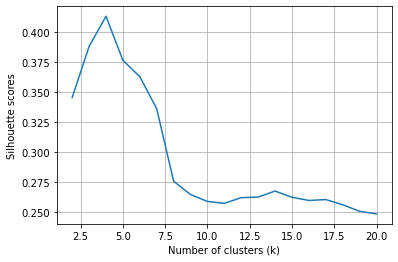

In [23]:
## 11.c
## Define a list to store the Silhouette scores
results = list()

for i in range(2, 21):
    print(i)
    ## Clustering the data
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(weather_scaled)
    kmeans_label = kmeans_md.labels_
    
    ## Computing the Silhouette score
    results.append(silhouette_score(weather_scaled, kmeans_label))
    
## Visualizing the silhouette scores
plt.plot(range(2, 21), results)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette scores')
plt.grid()
plt.show()

In [24]:
## 11.d
## Running K-Means with 4 clusters (highes Silhouette score)
kmeans_md = KMeans(n_clusters = 4, n_init = 20).fit(weather_scaled)

In [25]:
## 11.e
## Appending cluster labels
weather_scaled['cluster'] = kmeans_md.labels_
weather_scaled.head()

,air_pressure01,air_temp01,avg_wind_direction01,avg_wind_speed01,max_wind_direction01,max_wind_speed01,relative_humidity01,cluster
0,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000,1
1,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429,2
2,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714,2
3,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000,0
4,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429,2


In [26]:
## Cluster 0
cluster_0 = weather_scaled[weather_scaled['cluster'] == 0].reset_index(drop = True)
cluster_0.describe()

,air_pressure01,air_temp01,avg_wind_direction01,avg_wind_speed01,max_wind_direction01,max_wind_speed01,relative_humidity01,cluster
count,16455.000000,16455.000000,16455.000000,16455.000000,16455.000000,16455.000000,16455.000000,16455.0
mean,0.501466,0.199446,0.536994,0.109041,0.566128,0.118383,0.882626,0.0
std,0.177039,0.116424,0.191741,0.081202,0.196949,0.086956,0.126811,0.0
min,0.000000,0.000000,0.000000,0.004274,0.000000,0.000000,0.486857,0.0
25%,0.400000,0.117647,0.479109,0.047009,0.512535,0.054264,0.765714,0.0
50%,0.500000,0.168627,0.545961,0.089744,0.579387,0.096899,0.961143,0.0
75%,0.620000,0.278431,0.629526,0.149573,0.665738,0.162791,0.989714,0.0
max,0.930000,0.513725,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [27]:
## Cluster 1
cluster_1 = weather_scaled[weather_scaled['cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

,air_pressure01,air_temp01,avg_wind_direction01,avg_wind_speed01,max_wind_direction01,max_wind_speed01,relative_humidity01,cluster
count,26078.000000,26078.000000,26078.000000,26078.000000,26078.000000,26078.000000,26078.000000,26078.0
mean,0.630116,0.598603,0.595374,0.092781,0.645207,0.100514,0.336407,1.0
std,0.156178,0.120885,0.148867,0.055851,0.152689,0.056901,0.150749,0.0
min,0.040000,0.156863,0.183844,0.000000,0.392758,0.000000,0.000000,1.0
25%,0.520000,0.509804,0.495822,0.047009,0.529248,0.054264,0.224000,1.0
50%,0.640000,0.592157,0.562674,0.085470,0.601671,0.093023,0.316571,1.0
75%,0.740000,0.690196,0.632312,0.128205,0.704735,0.135659,0.445714,1.0
max,1.000000,1.000000,0.994429,0.367521,1.000000,0.387597,0.700571,1.0


In [28]:
## Cluster 2
cluster_2 = weather_scaled[weather_scaled['cluster'] == 2].reset_index(drop = True)
cluster_2.describe()

,air_pressure01,air_temp01,avg_wind_direction01,avg_wind_speed01,max_wind_direction01,max_wind_speed01,relative_humidity01,cluster
count,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.0
mean,0.630032,0.557157,0.118806,0.092248,0.162400,0.097536,0.291621,2.0
std,0.153315,0.148688,0.077987,0.056616,0.084985,0.060033,0.151532,0.0
min,0.060000,0.015686,0.000000,0.004274,0.000000,0.000000,0.000000,2.0
25%,0.500000,0.450980,0.055710,0.051282,0.103064,0.054264,0.189714,2.0
50%,0.650000,0.564706,0.111421,0.076923,0.147632,0.081395,0.266286,2.0
75%,0.750000,0.658824,0.161560,0.119658,0.200557,0.124031,0.354286,2.0
max,1.000000,0.988235,0.367688,0.380342,0.690808,0.422481,0.854857,2.0


In [29]:
## Cluster 3
cluster_3 = weather_scaled[weather_scaled['cluster'] == 3].reset_index(drop = True)
cluster_3.describe()

,air_pressure01,air_temp01,avg_wind_direction01,avg_wind_speed01,max_wind_direction01,max_wind_speed01,relative_humidity01,cluster
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.0
mean,0.612109,0.551158,0.950851,0.064942,0.058051,0.078863,0.321809,3.0
std,0.142160,0.159895,0.056093,0.042965,0.062217,0.049370,0.162464,0.0
min,0.090000,0.019608,0.582173,0.000000,0.000000,0.000000,0.043429,3.0
25%,0.520000,0.458824,0.933148,0.029915,0.013928,0.042636,0.221714,3.0
50%,0.610000,0.568627,0.969359,0.055556,0.036212,0.069767,0.280000,3.0
75%,0.720000,0.674510,0.988858,0.089744,0.077994,0.104651,0.389714,3.0
max,1.000000,0.984314,1.000000,0.299145,0.392758,0.333333,0.973714,3.0


In [ ]:
## Cluster 0 has the lowest air_pressure and air_temp, and highest relative_humidity, which are distinguishable from other clusters
## Cluster 1, 2, and 3 have similar data for air_pressure, air_temp, and relative_humidity.
## These clusters look to be clustered based on wind direction data. Wind speed data between them are not very far away.
## Cluster 1 has wind direction between South and South West (avg 0.595374, std 0.148867)
## Cluster 2 has wind of West North East direction (avg 0.118806, std 0.077987)
## Cluster 3 has wind direction between North and East North West (avg 0.950851, std 0.056093)

## The clustering makes sense

In [4]:
## 15.a
import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'danhtran358-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Get file content
telecom_train_stream = bucket.Object('churn-bigml-80(1).csv').get().get('Body')
telecom_test_stream = bucket.Object('churn-bigml-20(1).csv').get().get('Body')

## Reading the csv file
telecom_train = pd.read_csv(telecom_train_stream)
telecom_test = pd.read_csv(telecom_test_stream)

telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
## 15.b
## Numeralize categorical variable Churn
telecom_train['Churn'] = np.where(telecom_train['Churn'] == False, 0, 1)
telecom_test['Churn'] = np.where(telecom_test['Churn'] == False, 0, 1)

## Numeralize categorical variable International_plan
telecom_train['International_plan'] = np.where(telecom_train['International_plan'] == 'No', 0, 1)
telecom_test['International_plan'] = np.where(telecom_test['International_plan'] == 'No', 0, 1)

## Numeralize categorical variable Voice_mail_plan
telecom_train['Voice_mail_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'No', 0, 1)
telecom_test['Voice_mail_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'No', 0, 1)

## Create total_charge variable
telecom_train['total_charge'] = np.sum(telecom_train[['Total_day_charge', 'Total_eve_charge', 'Total_night_charge', 'Total_intl_charge']], axis = 1)
telecom_test['total_charge'] = np.sum(telecom_test[['Total_day_charge', 'Total_eve_charge', 'Total_night_charge', 'Total_intl_charge']], axis = 1)

In [7]:
## 15.c
## Filter the input variables
telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]

In [145]:
## 15.d
## Define input and target variables
X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

## lists to feature importances
rf_feature_importances = list()
ada_feature_importances = list()
grad_feature_importances = list()

## 1000 times? Typo?
for i in range(100):
    ## Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## Build models and store feature importances
    md_rf = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_train, Y_train)
    rf_feature_importances.append(md_rf.feature_importances_)
    
    md_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 500, learning_rate = 0.01).fit(X_train, Y_train)
    ada_feature_importances.append(md_ada.feature_importances_)
    
    md_grad = GradientBoostingClassifier(max_depth = 3, n_estimators = 500, learning_rate = 0.01).fit(X_train, Y_train)
    grad_feature_importances.append(md_grad.feature_importances_)


In [146]:
## Combine all feature importances across 100 splits and 3 models
all_feature_importances = rf_feature_importances + ada_feature_importances + grad_feature_importances

In [147]:
## Calculate the average importances of variables across 100 splits and 3 models
print(np.mean(all_feature_importances, axis = 0))

[0.11231234 0.16966497 0.07980502 0.48977414 0.14844353]


In [8]:
## 15.e-f
## Use the remaining inputs (exclude Voice_mail_plan) and target variables
X = telecom_train[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

In [9]:
## Use dataframes to store parameters to build models and store total scores
from itertools import product
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())

rf_dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7],
                 'total_accuracy' : [0.0], 'total_recall' : [0.0]}
ada_dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001],
                  'total_accuracy' : [0.0], 'total_recall' : [0.0]}

rf_results = expand_grid(rf_dictionary)
ada_results = expand_grid(ada_dictionary)
grad_results = expand_grid(ada_dictionary)

In [ ]:
for i in range(100):
    ## Split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## Build random forest models for each parameter combination and store scores
    for i in range(rf_results.shape[0]):
        parameters = rf_results.loc[i]
        md_rf = RandomForestClassifier(max_depth = parameters['depth'],
                                       n_estimators = int(parameters['n_tree'])).fit(X_train, Y_train)
        
        ## Predicting
        pred_rf = md_rf.predict_proba(X_test)[:, 1]
        pred_rf = np.where(pred_rf < 0.1, 0, 1)

        ## Computing and accumulating scores
        rf_results.at[i, 'total_accuracy'] = rf_results.at[i, 'total_accuracy'] + accuracy_score(Y_test, pred_rf)
        rf_results.at[i, 'total_recall'] = rf_results.at[i, 'total_recall'] + recall_score(Y_test, pred_rf)
    
    ## Build AdaBoost models for each parameter combination and store scores
    for i in range(ada_results.shape[0]):
        parameters = ada_results.loc[i]
        md_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = parameters['depth']),
                                    n_estimators = int(parameters['n_tree']),
                                    learning_rate = parameters['learning_rate']).fit(X_train, Y_train)
        
        ## Predicting
        pred_ada = md_ada.predict_proba(X_test)[:, 1]
        pred_ada = np.where(pred_ada < 0.1, 0, 1)

        ## Computing and accumulating scores
        ada_results.at[i, 'total_accuracy'] = ada_results.at[i, 'total_accuracy'] + accuracy_score(Y_test, pred_ada)
        ada_results.at[i, 'total_recall'] = ada_results.at[i, 'total_recall'] + recall_score(Y_test, pred_ada)
    
    ## Build Gradient Boosting models for each parameter combination and store scores
    for i in range(grad_results.shape[0]):
        parameters = grad_results.loc[i]
        md_grad = GradientBoostingClassifier(max_depth = parameters['depth'],
                                             n_estimators = int(parameters['n_tree']),
                                             learning_rate = parameters['learning_rate']).fit(X_train, Y_train)
        
        ## Predicting
        pred_grad = md_grad.predict_proba(X_test)[:, 1]
        pred_grad = np.where(pred_grad < 0.1, 0, 1)

        ## Computing and accumulating scores
        grad_results.at[i, 'total_accuracy'] = grad_results.at[i, 'total_accuracy'] + accuracy_score(Y_test, pred_grad)
        grad_results.at[i, 'total_recall'] = grad_results.at[i, 'total_recall'] + recall_score(Y_test, pred_grad)

In [ ]:
## Sort the dataframe by average scores
rf_results['avg_accuracy'] = rf_results['total_accuracy'] / 100
rf_results['avg_recall'] = rf_results['total_recall'] / 100
rf_results.sort_values(by = ['avg_recall', 'avg_accuracy'], ascending = [False, False])

In [ ]:
## Sort the dataframe by average scores
ada_results['avg_accuracy'] = ada_results['total_accuracy'] / 100
ada_results['avg_recall'] = ada_results['total_recall'] / 100
ada_results.sort_values(by = ['avg_recall', 'avg_accuracy'], ascending = [False, False])

In [ ]:
## Sort the dataframe by average scores
grad_results['avg_accuracy'] = grad_results['total_accuracy'] / 100
grad_results['avg_recall'] = grad_results['total_recall'] / 100
grad_results.sort_values(by = ['avg_recall', 'avg_accuracy'], ascending = [False, False])

In [118]:
## 15.g
## Use the remaining inputs (exclude Voice_mail_plan) and target variables
X_train = telecom_train[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]
Y_train = telecom_train['Churn']
X_test = telecom_test[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]
Y_test = telecom_test['Churn']
    
## Random forest model
md_rf = RandomForestClassifier(max_depth = , n_estimators = ).fit(X_train, Y_train)
    
## Predicting
pred_rf = md_rf.predict_proba(X_test)[:, 1]

## AdaBoost model
md_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = ), n_estimators = , learning_rate = ).fit(X_train, Y_train)

## Predicting
pred_ada = md_ada.predict_proba(X_test)[:, 1]

## Gradient Boosting model
md_grad = GradientBoostingClassifier(max_depth = , n_estimators = , learning_rate = ).fit(X_train, Y_train)

## Predicting
pred_grad = md_grad.predict_proba(X_test)[:, 1]

[[0.8520599250936329,
  0.8689138576779026,
  0.8651685393258427,
  0.8520599250936329,
  0.8726591760299626,
  0.8707865168539326,
  0.8520599250936329,
  0.8726591760299626,
  0.8689138576779026,
  0.8520599250936329,
  0.8726591760299626,
  0.8689138576779026,
  0.8520599250936329,
  0.8726591760299626,
  0.8689138576779026]]

In [119]:
## Ensemble of likelihood
X_rf = pd.concat([pd.DataFrame(pred_rf),pd.DataFrame(pred_ada),pd.DataFrame(pred_grad),Y_test.reset_index(drop = True)], axis = 1)

## Input variables
X_rf_stacked = pd.concat([pd.DataFrame(pred_rf),pd.DataFrame(pred_ada),pd.DataFrame(pred_grad)], axis = 1)

## Random forest model
md_rf_stacked = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_rf_stacked, Y_test)

## Extracting ensemble likelihood
pred_rf_stacked = md_rf_stacked.predict_proba(X_rf_stacked)[:,1]

## Classifying
pred_rf_stacked = np.where(pred_rf_stacked < 0.1, 0, 1)

print(accuracy_score(Y_test, pred_rf_stacked))
print(recall_score(Y_test, pred_rf_stacked))

[[0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589,
  0.8589743589743589]]